# 10 In-Class Assignment: Eigenproblems

<img src="https://campusinvolvement.umich.edu/files/campusinvolvement/field/image/helmets.jpg" alt="Image of two football helmets hitting each other. One is MSU and one is UofM which matches an example we will do in class" width="50%">

Image from: [https://campusinvolvement.umich.edu/](https://campusinvolvement.umich.edu/) 

### Agenda for today's class (80 minutes)

1. (10 minutes) [Homework 2 Review](#Homework-2-Review)
2. (20 minutes) [Pre Class Review](#Pre-Class-Review)
3. (25 minutes) [Markov Models](#Introduction-to-Markov-Models)
4. (25 minutes) [Another Markov Model Example](#Another-Markov-Model-Example)




---
<a name=Homework-2-Review></a>
## 1. Homework 2 Review

* Here we will spend sometime going over our HW2 results. 
* **Reminder:** We have our Quiz2 this week! Make sure you view your HW results, learn from any mistakes, and study for the upcoming quiz.




---
<a name=Pre-Class-Review></a>
## 2. Pre Class Review





---
<a name=Introduction-to-Markov-Models></a>
## 3.  Markov Models


>In probability theory, a Markov model is a stochastic model used to model randomly changing systems. 
It is assumed that future states depend only on the current state, not on the events that occurred before it.
>
> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/1126px-Markovkate_01.svg.png" width=25%>
> A diagram representing a two-state Markov process, with the states labelled E and A. 
Each number represents the probability of the Markov process changing from one state to another state, with the direction indicated by the arrow. 
For example, if the Markov process is in state A, then the probability it changes to state E is 0.4, while the probability it remains in state A is 0.6.

From: [Wikipedia](https://en.wikipedia.org/wiki/Markov_model)

The above state model can be represented by a transition matrix. 

$$\begin{array}{cc}
& \text{Current State}  \\
P =  &
\begin{bmatrix}
    p_{A\rightarrow A} & p_{E\rightarrow A}  \\
    p_{A\rightarrow E} & p_{E\rightarrow E} 
\end{bmatrix}
\end{array}
\text{Next state}$$

In other words we can write the above as follows

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

In [3]:
A = np.matrix([[0.6, 0.7],[0.4, 0.3]])
sym.Matrix(A)

⎡0.6  0.7⎤
⎢        ⎥
⎣0.4  0.3⎦

Notice how the columns in the matrix all add to one. This is because all of the transition probabilities out of a matrix must add to 100 percent. 

Now, consider the following house map with cats in each room...

At each time step, there is an equal probability of a cat staying in their current room or moving to a new room. 
If a cat chooses to leave a room, then there is an equal chance of that cat picking any of the doors in the room to leave. 

<img src="https://lh4.googleusercontent.com/CGFHfJgtrPu-2bZPhPul1ll8B3tqC1Vs8jRwnZ13v8MqRAagWhrSmJ0cznYIP3ePg5co5AVI8g=w712" alt="Top down diagram of a house with three rooms (see text for more description" width="50%">

&#9989;**<font color=red>DO THIS :</font>** Try to draw a Markov chain (Markov matrix) for the above system of equations. Be prepared to share your diagram with the class. 

A Markov chain can be represented as a Markov transition model of the form $Ax=b$. 
Where $A$ is your probability tranisition matrix (often represented as a $P$ instead of an $A$). 
$x$ is the state before the transition and $b$ is the state after the transition.

&#9989;**<font color=red>QUESTION:</font>** Generate a Markov transition model represented as a matrix $P$ of the form:
$$
\begin{array}{ccc}
& \text{Current Room}  \\
P =  &
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix}
\end{array}
\text{Next Room}
$$

Where $p_{ij}$ are probability transitions of the cat moving between rooms (from room $j$ to room $i$):

In [4]:
##put your answer here
P = np.matrix([[1/2,1/3,1/4],[1/3,1/2,1/4],[1/6,1/6,1/2]])
sym.Matrix(P)

⎡       0.5         0.333333333333333  0.25⎤
⎢                                          ⎥
⎢0.333333333333333         0.5         0.25⎥
⎢                                          ⎥
⎣0.166666666666667  0.166666666666667  0.5 ⎦

In [5]:
from answercheck import checkanswer

checkanswer.matrix(P,'1001a6fa07727caf8ce05226b765542c');

Testing [[0.5     0.33333 0.25   ]
 [0.33333 0.5     0.25   ]
 [0.16667 0.16667 0.5    ]]
Answer seems to be correct



&#9989;**<font color=red>QUESTION:</font>**  Let's assume that the system starts with; 6 cats in room 1, 15 cats in room 2, and 3 cats in room 3. How many cats will be in each room after one time step (Store the values in a vector called ```current_state```)?

In [7]:
#Put your answer to the above question here.
current_state = P*np.matrix([[6,15,3]]).T
sym.Matrix(current_state)

⎡8.75 ⎤
⎢     ⎥
⎢10.25⎥
⎢     ⎥
⎣ 5.0 ⎦

In [8]:
from answercheck import checkanswer

checkanswer.vector(current_state,'98d5519be82a0585654de5eda3a7f397');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[ 8.75 10.25  5.  ]]
Answer seems to be correct



&#9989;**<font color=red>QUESTION:</font>** The following code will plot the number of cats as a function of time ($t$).  When this system converges, what is the steady state?

[[9.00002533]
 [9.00002548]
 [5.99994919]]


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


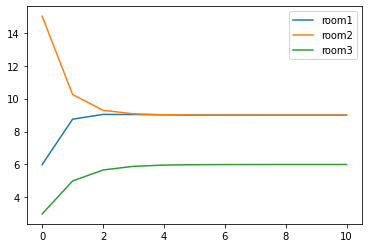

In [9]:
#Define Start State
room1 = [6]
room2 = [15]
room3 = [3]

current_state = np.matrix([room1, room2, room3])

for i in range(10):
    #update Current State
    current_state = P*current_state
    
    #Store history for each room
    room1.append(current_state[0])
    room2.append(current_state[1])
    room3.append(current_state[2])
    
plt.plot(room1, label="room1");
plt.plot(room2, label="room2");
plt.plot(room3, label="room3");
plt.legend();
print(current_state)

**Inspect the generated graph and put your answer to the above question here.**

&#9989;**<font color=red>QUESTION:</font>**  Calculate the eigenvalues and eigenvectors of your $P$ transition matrix.  

In [10]:
##put your answer here
v, w = np.linalg.eig(P)
print(v)
print(w)

[1.         0.16666667 0.33333333]
[[-6.39602149e-01 -7.07106781e-01 -4.08248290e-01]
 [-6.39602149e-01  7.07106781e-01 -4.08248290e-01]
 [-4.26401433e-01 -4.12648555e-16  8.16496581e-01]]


The eigenvector associated with the eigenvalue of 1 represents the steady state probability for our original transition matrix $P$.  

&#9989;**<font color=red>DO THIS:</font>** make a new vector called ```steadystate``` from the eigenvector of your $P$ matrix with a eigenvalue of 1.

In [11]:
## Put your answer here
steadystate = w[:,0]
print(steadystate)

[[-0.63960215]
 [-0.63960215]
 [-0.42640143]]


Since the ```steadystate``` vectors represent long term probibilities, they should sum to one (1).  However, most programming libraries (ex. numpy and sympy) return "normalized" eigenvectors to length of 1 (i.e. norm(e)==1). 

&#9989;**<font color=red>DO THIS:</font>**  Correct for the normalization by multiplying the ```steadystate``` eigenvector by a constant such that the sum of the vector elements add to 1. 

In [12]:
#Put your answer here
steadystate = steadystate/np.sum(steadystate)
print(steadystate)
print(np.sum(steadystate))

[[0.375]
 [0.375]
 [0.25 ]]
1.0


&#9989;**<font color=red>DO THIS:</font>**  Think about the cats problem, because one cat has to be in one of the three rooms. That means, the total number of cats will not change. If we add the number of cats at all rooms together, this number has to be the same. Therefore, if we start will 6+15+3=24 cats, there are also 24 cats at the ```steadystate```. Modify the steadystate to make sure the total number of cats is 24.

In [13]:
#Put your answer here
steadystate = 24*steadystate
print(steadystate)

[[9.]
 [9.]
 [6.]]


&#9989;**<font color=red>QUESTION:</font>** Why does the sum of the numbers at every stage remain the same? 


**Probability is always equal to 1**




---
<a name=Another-Markov-Model-Example></a>
## 3. Another Markov Model Example



> A sports broadcaster wishes to predict how many Michigan residents prefer University of Michigan teams and how many prefer Michigan State teams. 
She noticed that, year after year, most people stick with their preferred team; however, about 5% of Michigan fans switch to Michigan State, and about 3% of Michigan State fans switch to Michigan each year. 
However, there is no noticeable difference in the state's population of 10 million's preference at large; in other words, it seems Michigan sports fans have reached a stationary distribution. What might that be?
 <p style="text-align: right;">  This problem is from https://brilliant.org/wiki/stationary-distributions/ </p>

&#9989;**<font color=red>DO THIS:</font>** Try to draw a Markov chain for the above system of equations. Discuss your diagram with your classmate.

&#9989; **<font color=red>QUESTION:</font>**  Write a system of linear equations that represents how the populations change each year. Check your equations by writing the matrix ```P``` for the probability transitions matrix in your equations. Make sure your first row/column represents MSU and the second row/column represents UofM. 

**Put your answer here.**

In [24]:
# Store your matrix P here
P = np.matrix('0.97,0.05;0.03,0.95')

In [25]:
from answercheck import checkanswer

checkanswer.vector(P,'1d3f7cbebef4b610f3b0a2d97609c81f');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[0.97 0.03]
 [0.05 0.95]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION:</font>**   Use Numpy to calculate the eigenvalues and eigenvectors of your $P$ transition matrix.  

In [27]:
#Put the answer to the above quesiton here. 
v,w = np.linalg.eig(P)
print(v)
print(w)

[1.   0.92]
[[ 0.85749293 -0.70710678]
 [ 0.51449576  0.70710678]]


&#9989; **<font color=red>QUESTION:</font>**   Assuming each team starts with 500,000 fans, what is the steady state of this model? (I.e. in the long term how many Spartan and Wolverine fans will there be?).

In [28]:
#Put your answer here
steadystate = w[:,0]
steadystate = steadystate/np.sum(steadystate)
steadystate = steadystate*1000000
spartans = steadystate[0]
wolverines = steadystate[1]

In [29]:
from answercheck import checkanswer

checkanswer.float(spartans,'06d263de629f4dbe51eafd524b69ddd9');


    Trying to convert to a float using ```A = float(A)```.

Testing 625000.0
Answer seems to be correct



In [30]:
from answercheck import checkanswer

checkanswer.float(wolverines,'62d63699c8f7b886ec9b3cb651bba753');


    Trying to convert to a float using ```A = float(A)```.

Testing 375000.0
Answer seems to be correct



----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----